<a href="https://colab.research.google.com/github/ddenebb/estructures_Dataframe/blob/main/Tasca_M8_T01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise 1

Download the attached dataset, of records of Facebook posts about Thailand, and rank the different records using the K-means algorithm.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#images_dir = '/content/gdrive/My Drive/Images'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# importing libraries
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

path = "/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 8/Data/Publicacions Facebook Thailandia.csv"
import pandas as pd

df = pd.read_csv(path)

print(df.info(memory_usage='deep'))
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


K-means is an unsupervised learning algorithm used for clustering data points into groups based on their similarity. In order to use K-means on the dataset, it will need to be prepared selecting relevant columns, normalizing the data, and choosing the appropriate number of clusters.

Here are some steps that can be followed to prepare the dataset for K-means:

Remove irrelevant columns: Based on the analysis goals, columns that are not relevant to the analysis or are not numeric may be removed. For example, 'status_id', 'status_type', and 'status_published' columns may not be relevant for clustering analysis. They can be dropped using the drop() method.

Normalize the data: Since K-means is sensitive to the scale of the data, it is recommended to normalize the data so that all columns have the same scale. The StandardScaler class from the sklearn.preprocessing module can be used to normalize the data.

Choose the number of clusters: The number of clusters is a hyperparameter that needs to be chosen based on the analysis goals and the structure of the data. One way to determine the optimal number of clusters is to use the elbow method, which involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and selecting the number of clusters where the decrease in WCSS starts to level off.

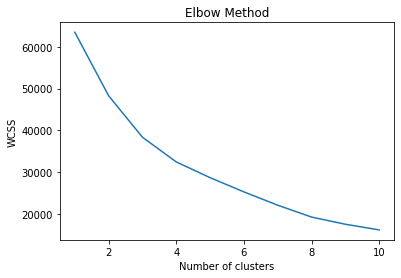

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Remove irrelevant columns
df = df.drop(['status_id', 'status_type', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1)

# Normalize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Th KMeans class will be used to perform the clustering analysis on the preprocessed dataset

Next we we will perform K-means clustering with 3 clusters (n_clusters=3). The fit_predict() method is used to fit the K-means model to the data and predict the cluster labels for each record in the dataset. The resulting cluster labels are added as a new column ('Cluster') to the original dataframe.

Finally, the number of records in each cluster will be printed using the value_counts() method. This will give us an idea of how many records belong to each cluster.

In [5]:
# import K-means library
from sklearn.cluster import KMeans
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(scaled_df)

# Add cluster labels to the original dataframe
df['Cluster'] = pred_y

# Print the number of records in each cluster
print(df['Cluster'].value_counts())


0    6405
2     372
1     273
Name: Cluster, dtype: int64


In [23]:
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
0,529,512,262,432,92,3,1,1,0,0
1,150,0,0,150,0,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0,0
3,111,0,0,111,0,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0,0
7047,2,0,0,1,1,0,0,0,0,0
7048,351,12,22,349,2,0,0,0,0,0


The three clusters can be plotted using a scatter plot. Matplotlib will be used to create a scatter plot of the data points, where each point is colored according to its cluster assignment.

We´ll create a figure with one row and three columns of subplots, and then plots the scatter plots of 'num_reactions' vs. 'num_shares', 'num_reactions' vs. 'num_likes', and 'num_likes' vs. 'num_shares' in the first, second, and third subplots, respectively. The cluster centroids to each scatter plot and sets the axis labels and titles for each subplot will be shown as well.

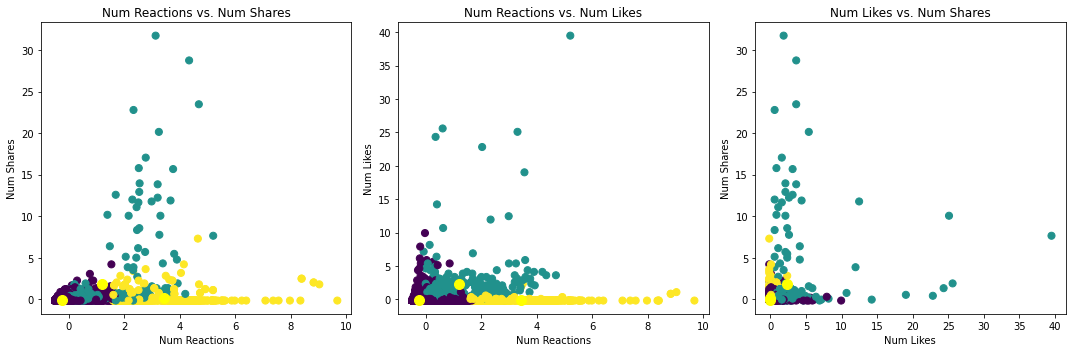

In [6]:
# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Plot num_reactions vs. num_shares in the first subplot
axes[0].scatter(scaled_df[:, 0], scaled_df[:, 5], s=50, c=pred_y)
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 5], s=100, c='yellow')
axes[0].set_title('Num Reactions vs. Num Shares')
axes[0].set_xlabel('Num Reactions')
axes[0].set_ylabel('Num Shares')

# Plot num_reactions vs. num_likes in the second subplot
axes[1].scatter(scaled_df[:, 0], scaled_df[:, 6], s=50, c=pred_y)
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 6], s=100, c='yellow')
axes[1].set_title('Num Reactions vs. Num Likes')
axes[1].set_xlabel('Num Reactions')
axes[1].set_ylabel('Num Likes')

# Plot num_likes vs. num_shares in the third subplot
axes[2].scatter(scaled_df[:, 6], scaled_df[:, 5], s=50, c=pred_y)
axes[2].scatter(kmeans.cluster_centers_[:, 6], kmeans.cluster_centers_[:, 5], s=100, c='yellow')
axes[2].set_title('Num Likes vs. Num Shares')
axes[2].set_xlabel('Num Likes')
axes[2].set_ylabel('Num Shares')

# Show the plot
plt.tight_layout()
plt.show()

# Exercise 2

Classify the different registers using the hierarchical clustering algorithm.

Hierarchical clustering is a type of clustering algorithm used in machine learning and data analysis. The goal of hierarchical clustering is to group similar data points into clusters based on their distance or similarity. The algorithm works by initially treating each data point as its own cluster, and then iteratively merging clusters that are closest together, until all data points are in a single cluster or a desired number of clusters is reached.

There are two main types of hierarchical clustering: agglomerative and divisive. 

In the context of the given example, the choice between agglomerative and divisive clustering depends on the particular problem and characteristics of the data being analyzed. Agglomerative clustering is a method that starts by considering each data point as a separate cluster and then iteratively merges pairs of clusters until a stopping criterion is met, such as a fixed number of clusters or a distance threshold. Divisive clustering, on the other hand, begins with a single cluster containing all data points and then recursively divides it into smaller clusters until a stopping criterion is met.

Agglomerative clustering is typically preferred when the number of clusters is unknown or when the data naturally forms a hierarchy. In the example, I have selected to create 3 clusters based on the elbow method, which makes agglomerative clustering a reasonable choice. Moreover, since the Ward linkage method is being used, which is known to perform well on many datasets, agglomerative clustering is an appropriate option.

In contrast, divisive clustering may be more suitable when the number of clusters is already known or when different levels of granularity in the cluster structure are sought. However, divisive clustering can be computationally expensive and may not always be practical for large datasets.

To perform hierarchical clustering on the dataset, the AgglomerativeClustering class from the sklearn.cluster module can be used.

A list named 'cols' is defined which holds tuples containing the names of the columns to be used for clustering and plotting. The number of clusters and distance metric to be used for clustering are also defined.

A 3x1 subplot figure is created using plt.subplots. A loop is then used to iterate over each pair of columns in 'cols'. The columns are extracted from the original dataframe, scaled using StandardScaler, and hierarchical clustering is performed using AgglomerativeClustering.

The resulting clusters are plotted using a scatter plot, where the x-axis and y-axis represent the two columns of interest. The pred_y variable is used to assign a different color to each cluster, and labels are added to the x-axis and y-axis along with a title to the subplot.

Finally, the spacing between subplots is adjusted and the figure is shown.

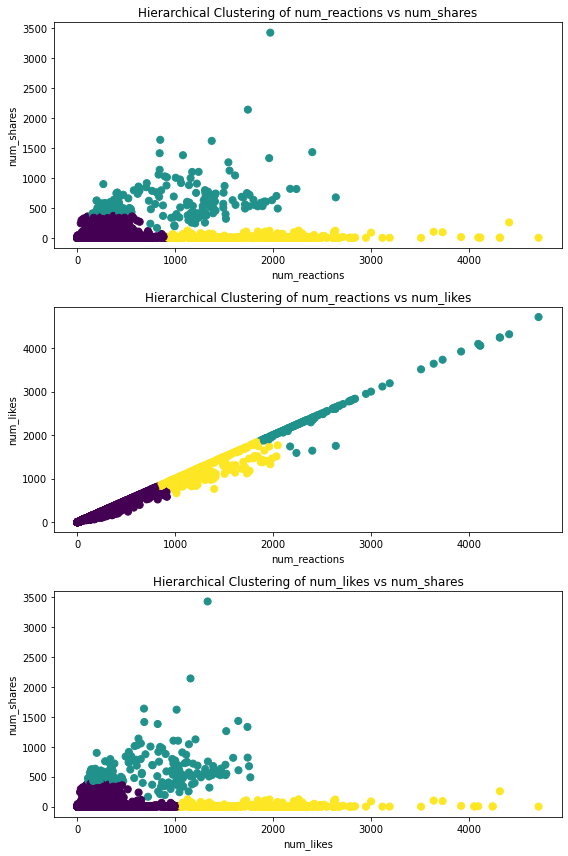

In [21]:
from sklearn.cluster import AgglomerativeClustering

# Define the columns to use for clustering and plotting
cols = [('num_reactions', 'num_shares'), ('num_reactions', 'num_likes'), ('num_likes', 'num_shares')]

# Define the number of clusters and distance metric
n_clusters = 3
metric = 'euclidean'

# Create a 3x1 subplot figure
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Loop over each pair of columns and perform clustering
for i, col in enumerate(cols):
    # Extract the columns of interest
    col_df = df[list(col)].values
    
    # Scale the columns
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(col_df)
    
    # Perform hierarchical clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters, affinity=metric, linkage='ward')
    hc.fit(scaled_df)
    
    # Get cluster labels
    pred_y = hc.labels_
    
    # Plot the clusters
    axs[i].scatter(col_df[:, 0], col_df[:, 1], s=50, c=pred_y)
    axs[i].set_title(f'Hierarchical Clustering of {col[0]} vs {col[1]}')
    axs[i].set_xlabel(col[0])
    axs[i].set_ylabel(col[1])

# Adjust spacing between subplots and show the figure
fig.tight_layout()
plt.show()


# Exercise 3

Calculate the clustering performance using a parameter such as silhouette.

The silhouette score measures how well each data point fits into its assigned cluster, based on both the distance between the data point and the other points in its assigned cluster, and the distance between the data point and the points in the nearest cluster.

Silhouette score is calculated for the hierarchical clustering algorithm using the silhouette_score function from the sklearn.metrics module. The silhouette score is computed for each data point and then averaged to give an overall score for the clustering performance.

The resulting silhouette score is printed to the console, indicating how well the clustering algorithm has performed. A higher score indicates better clustering performance, with a maximum score of 1 indicating that all data points are correctly assigned to their respective clusters.

In [22]:

# Import library silhouette score
from sklearn.metrics import silhouette_score
# Calculate silhouette score
sil_score = silhouette_score(scaled_df, pred_y)
print(f"Silhouette score for {col[0]} vs {col[1]}: {sil_score}")



Silhouette score for num_likes vs num_shares: 0.8189710006533167
